In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


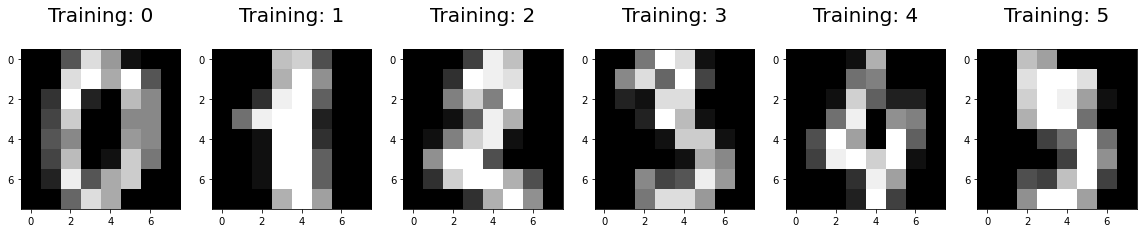

In [3]:
plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Variables

This section is for spliting data inyo training and testing sets. The training is used to training the model on how to calssify the images using the training data as examples. The testing is data that is used to testing whether the classifier is able to classify or predict the label of the images after it has been trained.

In [4]:
#importing the library used to split data into training and testing sets
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Random Forest Model

Using the random forest classifier built into sklearn to create a classification model.

In [5]:
# inporting the library used to create a random forent classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# random forest model
rf_model = RandomForestClassifier()

rf_model.fit(X_train,y_train)

print(f"Accuracy of the random forest model:",rf_model.score(X_test, y_test))

Accuracy of the random forest model: 0.98


The parameter that is picked for tuning in the max_depth of the tree. The max_depth of the model is set to None by default and thia could result into overfitting if it is not tuned. The tuning wil be done using GridSearchCV which performs hyperparameter tuning in order to determine the optimal values for a given model. This will help us determine the best max_depth of the model in order fro it to perfor optimally.

In [6]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

# create the parameter tuning function
def tuning_func(model):
    # define parameters for tuning
    params = {
        'max_depth': [3, 5, 7, 9],
    }

    # create random forest GridSearchCV model
    GSCV = GridSearchCV(estimator = rf_model, param_grid = params, cv = 3)

    # fitting the model
    GSCV.fit(X_train,y_train);

    # Get the tuning parameters
    param_values = GSCV.best_params_ # getting tuned parameters
    
    return param_values

depth = tuning_func(rf_model)

depth

{'max_depth': 9}

The value that will be chosen for the max_depth is 9 because that is the value that was produced by the GridSearchCV in order to make the model optimal.

In [7]:
# get the max_depth number from the depth dictionary
depth_num = depth.get('max_depth')

# random forest model
forest = RandomForestClassifier(max_depth = depth_num)

# fitting model
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# displaying accuracy of model
print(f"Accuracy random forest at max_depth of {depth_num}:",forest.score(X_test, y_pred))


Accuracy random forest at max_depth of 9: 1.0


# Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

# get the model predictions
y_pred = forest.predict(X_test)

# get confusion matrix
confusion = confusion_matrix(y_test,y_pred)

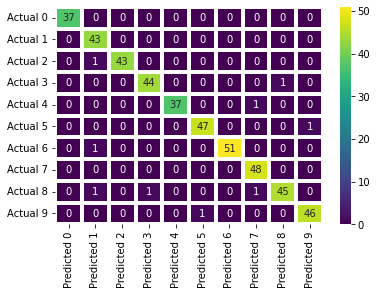

In [17]:
from sklearn.utils.multiclass import unique_labels

# displaying the heatmap of the confusion matrix
labels = unique_labels(y_test)
columns = [f'Predicted {label}' for label in labels]
index = [f'Actual {label}' for label in labels]

confusion_df = pd.DataFrame(confusion, columns = columns, index = index )

sns.heatmap(confusion_df, cmap = 'viridis', annot=True, fmt="d", linewidth=4);

From the confusion matrix above, the model struggles with predicting classe and 0 and 4 the most.

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       0.96      1.00      0.98        48
           8       0.98      0.94      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

